<a href="https://colab.research.google.com/github/abhinavjainn412/Retail-Chain-Sales-Forecasting/blob/main/Retail_Chain_Sales_Prediction_Final_Year_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading the csv file and converting it to pandas dataframes
sales_df = pd.read_csv("/content/drive/MyDrive/MajorProjectDatasetFiles/Rossmann Stores Data.csv",parse_dates=['Date'])
stores_df = pd.read_csv("/content/drive/MyDrive/MajorProjectDatasetFiles/store.csv")

In [4]:
#we have historical sales data and stores datasets
#first look of the sales data
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
#first look of stores dataframe
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
stores_df['Store'][0]

1

In [7]:
#info about the sales dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [8]:
#info about the stores
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
#null values in stores df
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Text(0.5, 0, 'Competition Distance Distribution Plot')

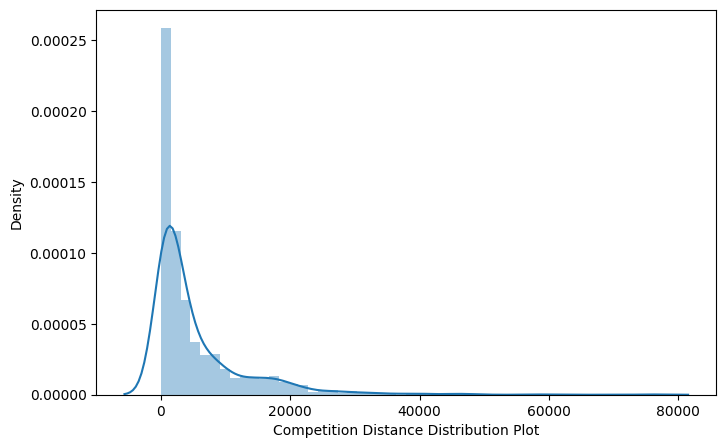

In [10]:
#distribution plot of competition distance
sns.distplot(x=stores_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

In [11]:
# filling competition distance with the median value
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(), inplace = True)

In [12]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [13]:
# imputing the nan values of promo2 related columns with 0
stores_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_df['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_df['PromoInterval'].fillna(value=0,inplace=True)

In [14]:
#check
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [15]:
#merge the datasets on stores data
df = sales_df.merge(right=stores_df, on="Store", how="left")

In [16]:
#first five rows of the merged dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [17]:
#shape of the dataframe
df.shape

(1017209, 18)

In [18]:
#datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [19]:
#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [20]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [21]:
#change into int type
df['StateHoliday'].replace({'0':0}, inplace=True)

In [22]:
#creating features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()

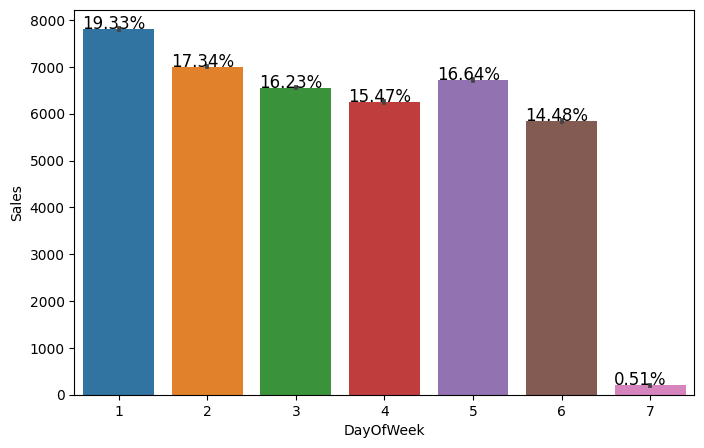

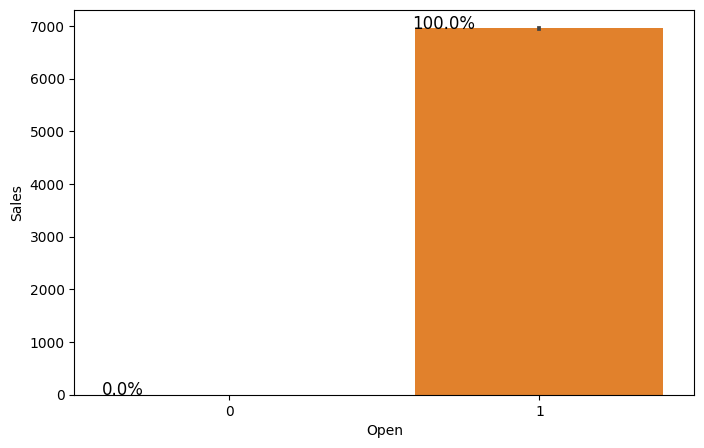

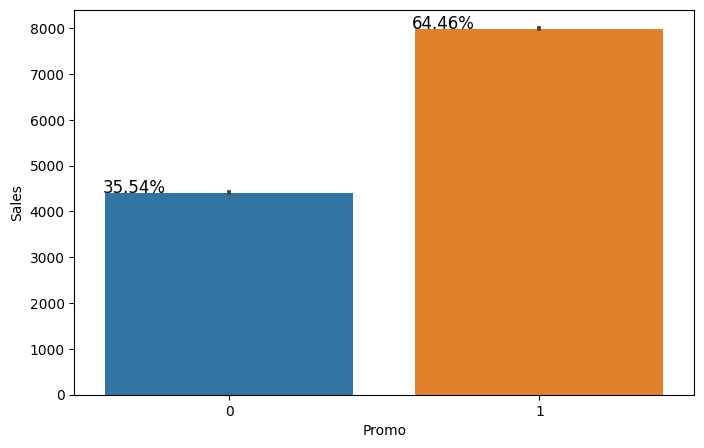

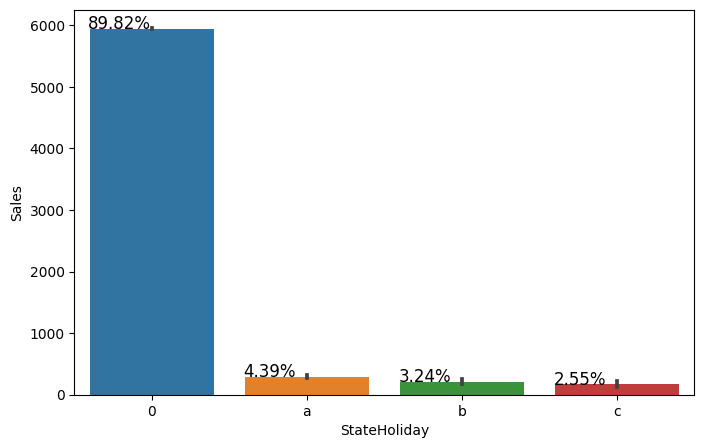

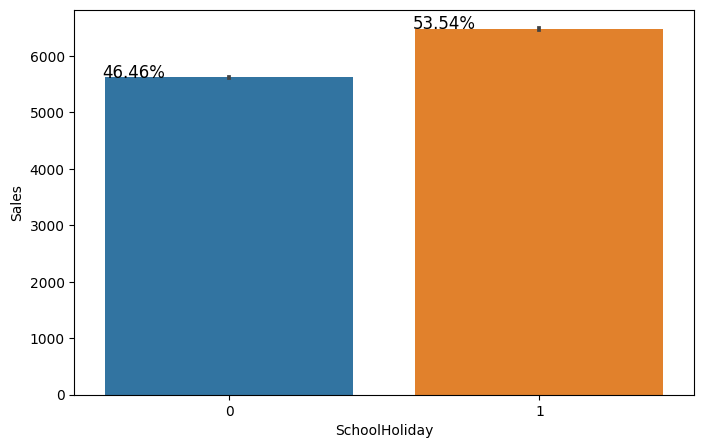

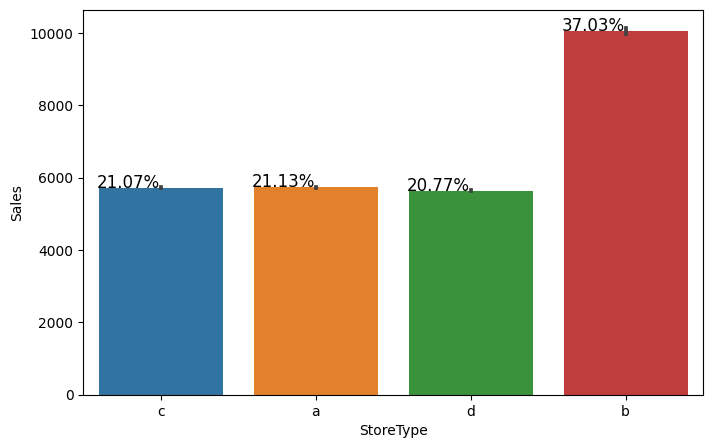

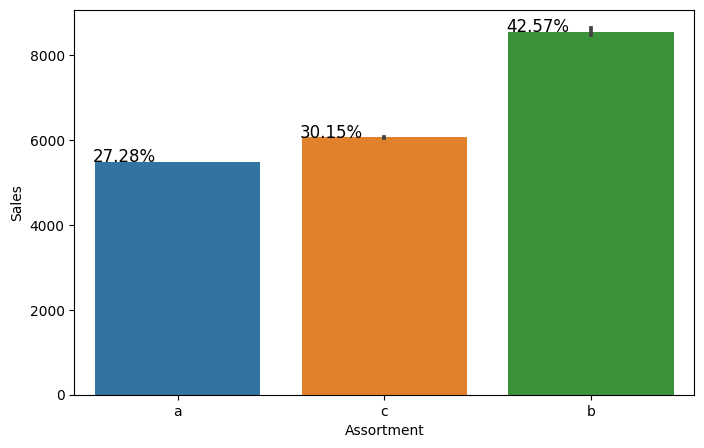

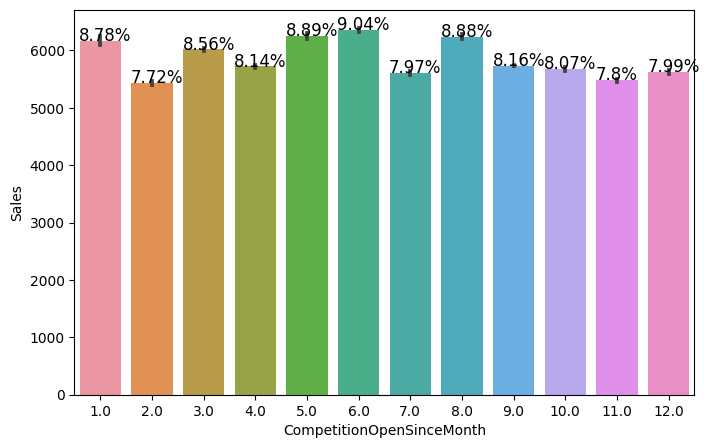

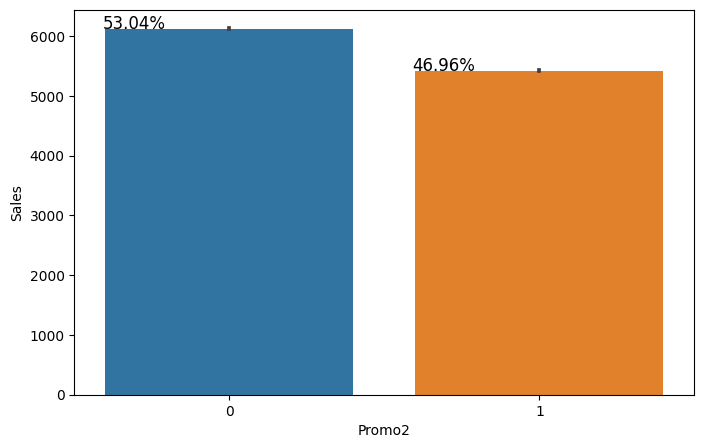

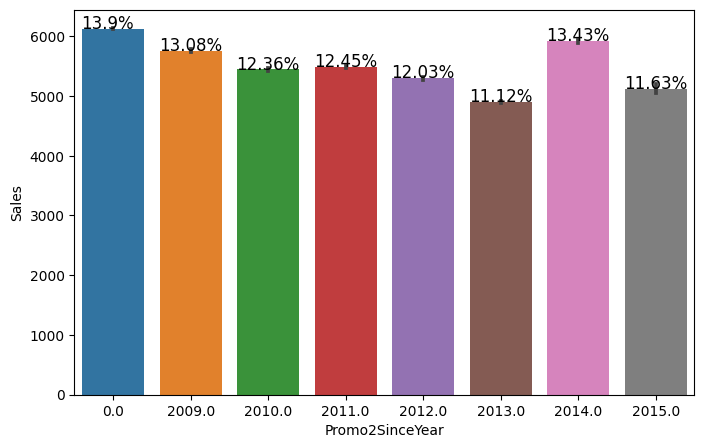

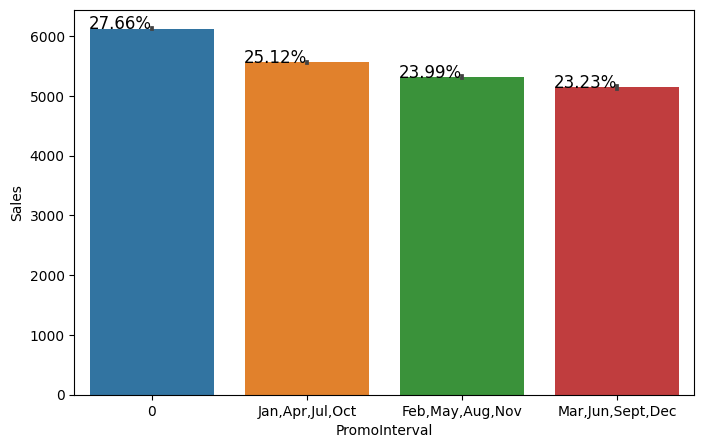

In [ ]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

<Axes: xlabel='Open', ylabel='Sales'>

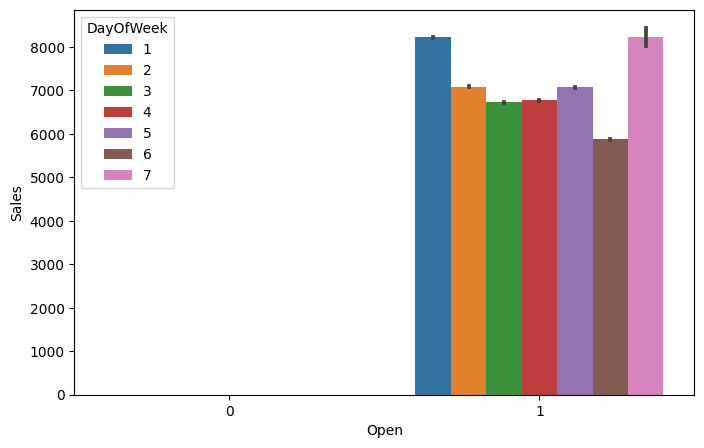

In [23]:
# open and storetype relationship 
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

<Axes: xlabel='Open', ylabel='count'>

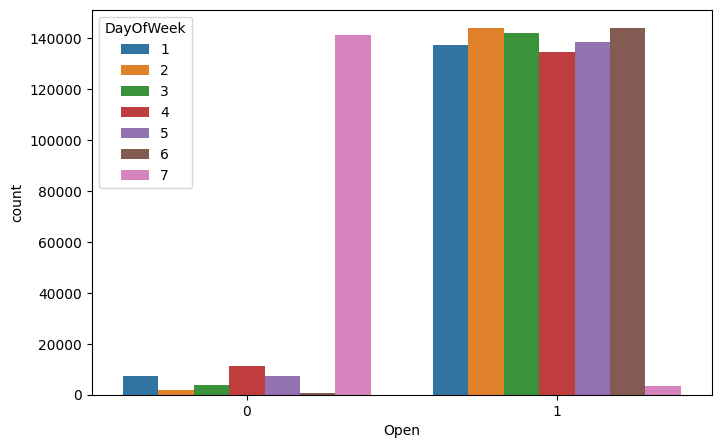

In [24]:
#Lets see open, how many shops are open on which days 
#and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
sns.countplot(x=df["Open"], hue=df["DayOfWeek"])

<Axes: xlabel='StoreType', ylabel='Sales'>

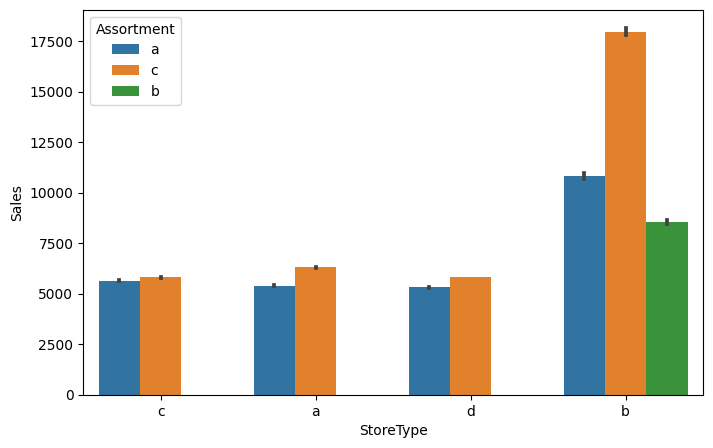

In [25]:
#Let's check the relationship between store type, assortment levels and sales
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

In [26]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


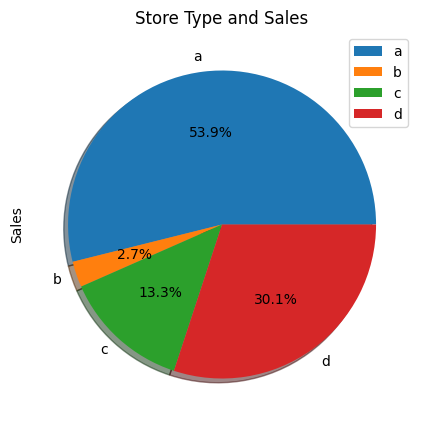

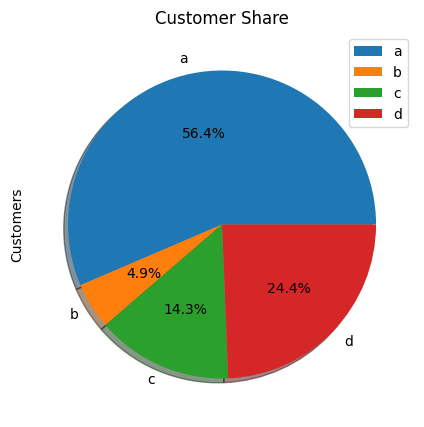

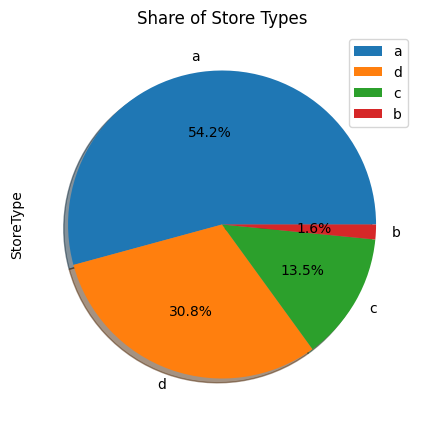

In [27]:
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

In [28]:
years

array([2015, 2014, 2013])

In [29]:
#sales over the years
sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]

In [30]:
#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

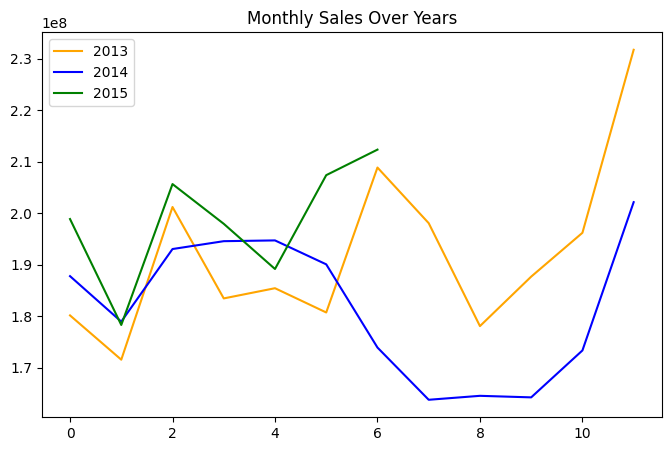

In [31]:
#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

<Axes: xlabel='Customers', ylabel='Sales'>

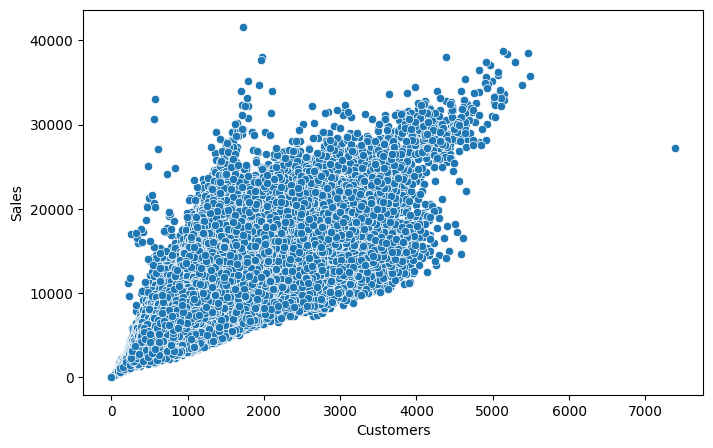

In [32]:
#scatterplot of Customers and Sales
sns.scatterplot(x=df['Customers'], y=df['Sales'])

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

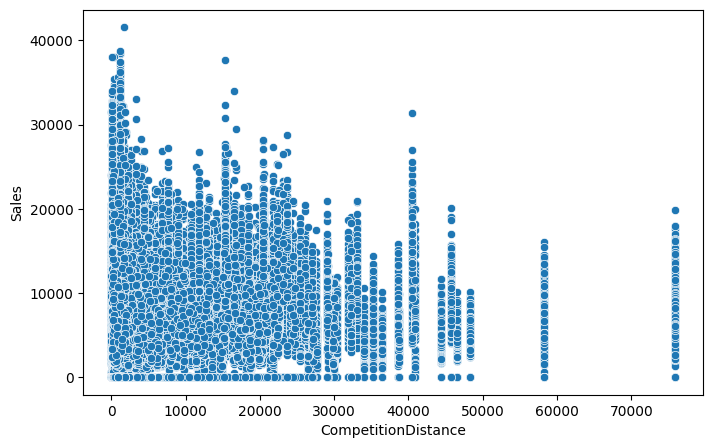

In [33]:
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

<Axes: ylabel='Density'>

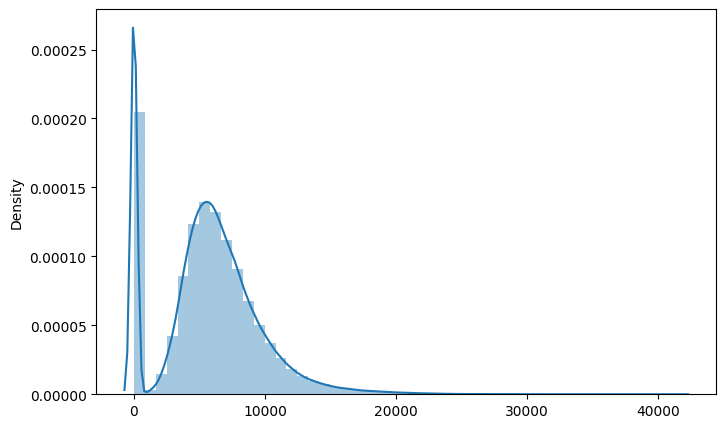

In [34]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df['Sales'])

In [35]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

<Axes: >

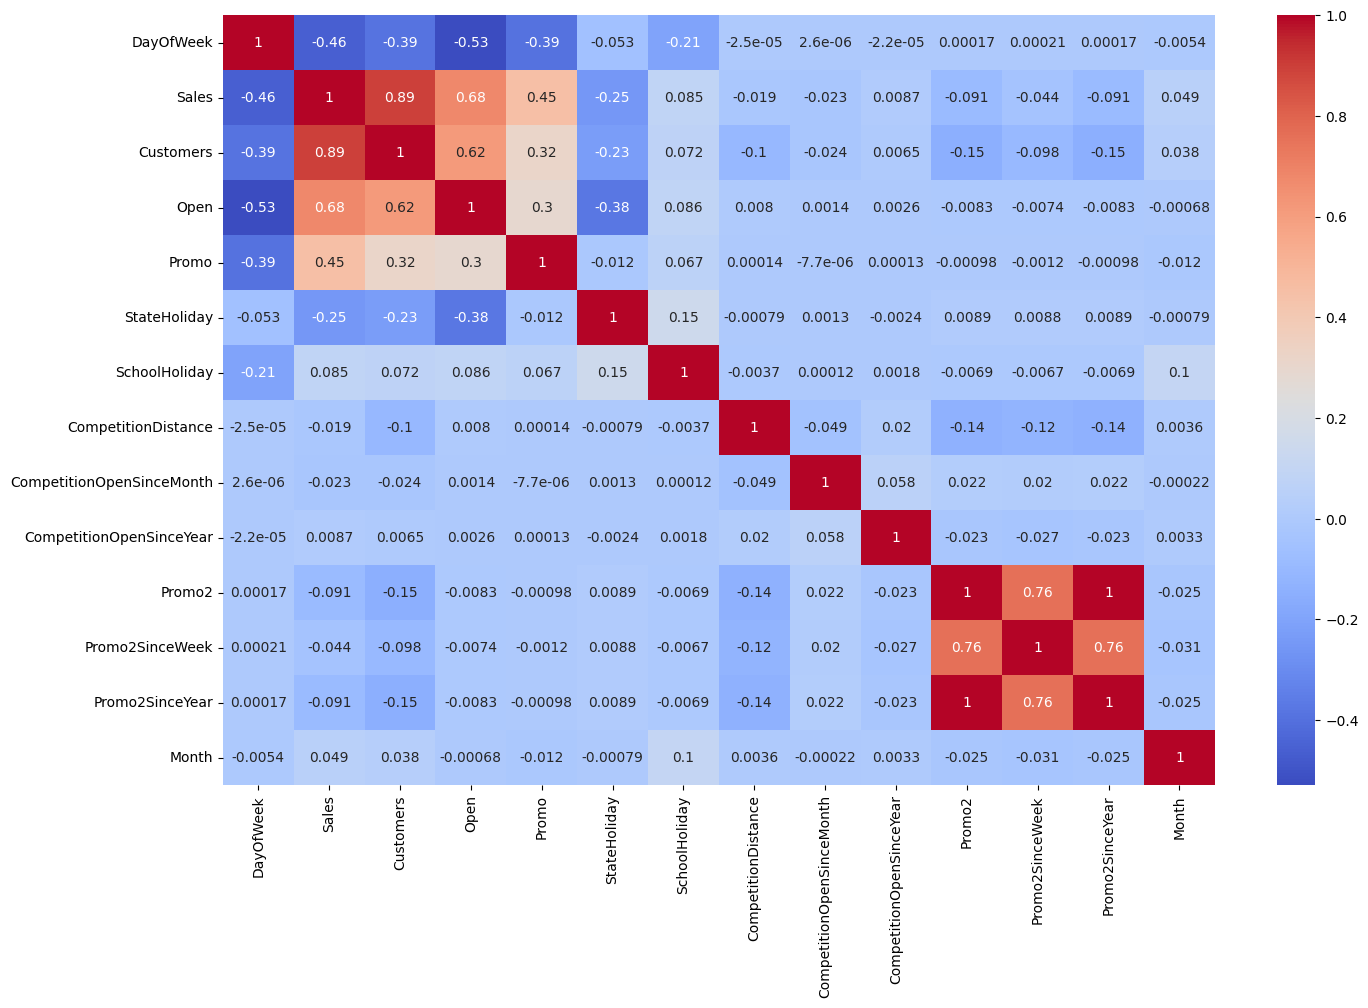

In [36]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

In [37]:
#no of observations for closed stores with 0 sales
(df[df.Open == 0]).shape

(172817, 22)

In [38]:
#since the stores closed had 0 sale value; removing the irrelevant part
df1 = df[df.Open != 0]
df1.drop('Open', axis=1, inplace=True)

In [39]:
# check
df1.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212


<Axes: ylabel='Density'>

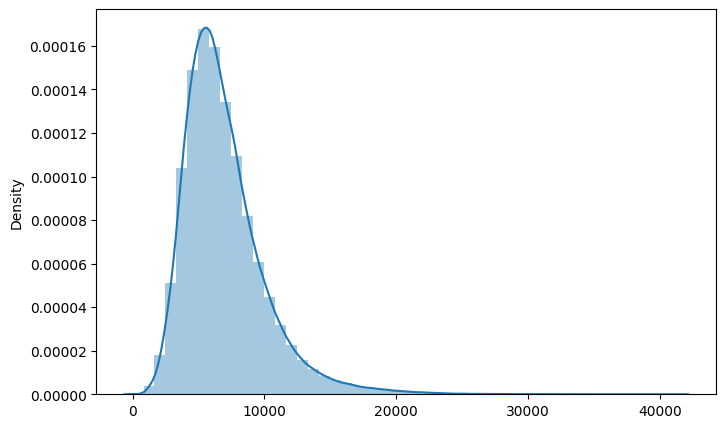

In [40]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df1['Sales'])

In [41]:
## transformation
df1['Sales'] = np.log(df1['Sales'])

In [42]:
df1.dropna(inplace=True)

In [43]:
df1.drop(df1[df1['Sales'] == float("-inf")].index,inplace=True)

<Axes: ylabel='Density'>

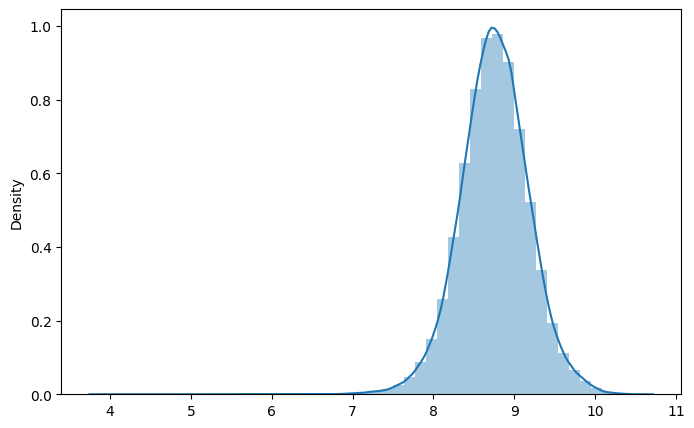

In [44]:
#distribution plot of Sales
sns.distplot(x=df1['Sales'])

In [45]:
#changing into boolean 
df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [46]:
#combining competition open since month and year into total months
df1['CompetitionOpen'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + (df1['Month'] - df1['CompetitionOpenSinceMonth'])
#correcting the neg values
df1['CompetitionOpen'] = df1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [47]:
#changing promo2 features into meaningful inputs
#combining promo2 to total months
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + (df1['WeekOfYear'] - df1['Promo2SinceWeek'])*0.230137

#correcting the neg values
df1['Promo2Open'] = df1['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df1['Promo2']

#creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',')
    if df['Month'] and month_dict[df['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

#Applying 
df1['Promo2running'] = df1.apply(promo2running,axis=1)*df1['Promo2']

#Dropping unecessary columns
df1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [48]:
#setting date and store as index
df1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df1.sort_index(inplace=True)

In [49]:
df1.head(1)

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-01,85,2,8.34759,619,0,1,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0


Total number of Outliers present in the Sales column are 1559.


[Text(0.5, 1.0, 'Outliers Distribution')]

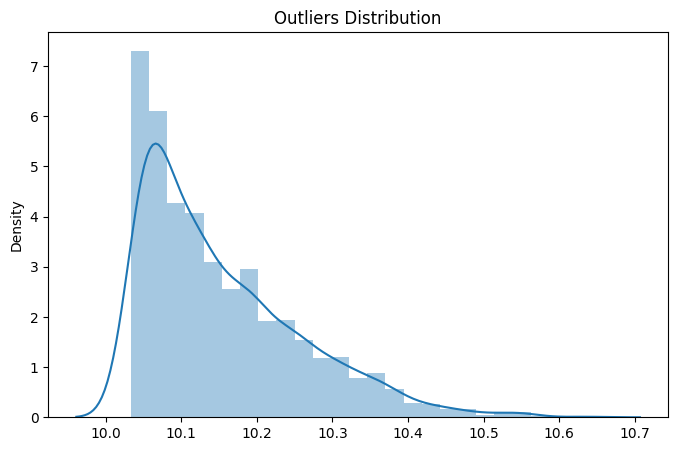

In [50]:
#code to seperate outliers
mean_sales = np.mean(df1['Sales']) #mean
sd_sales = np.std(df1['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df1['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers        
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')

In [51]:
#percentage of sales greater than 10.2
sales_outliers = df1.loc[df1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(df1))*100
#print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 0.050809036191667316


In [52]:
#exploring the reasons behind this behaviour
sales_outliers

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-07,817,1,10.381676,4065,1,0,0,a,a,140.0,0,2013,1,2,7,82.0,0.0,0
2013-01-08,817,2,10.241744,3862,1,0,0,a,a,140.0,0,2013,1,2,8,82.0,0.0,0
2013-01-21,817,1,10.330942,3900,1,0,0,a,a,140.0,0,2013,1,4,21,82.0,0.0,0
2013-01-22,817,2,10.210605,7388,1,0,0,a,a,140.0,0,2013,1,4,22,82.0,0.0,0
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,2,5,34,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-13,1114,1,10.245516,3592,1,0,0,a,c,870.0,0,2015,7,29,194,22.0,0.0,0
2015-07-19,262,7,10.362967,4691,0,0,0,b,a,1180.0,0,2015,7,29,200,26.0,0.0,0
2015-07-26,262,7,10.390440,4783,0,0,0,b,a,1180.0,0,2015,7,30,207,26.0,0.0,0


In [53]:
#lets see which stores were open on Sunday in the outliers dataframe
#store 262
sales_outliers.loc[sales_outliers['DayOfWeek']==7]

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,2,5,34,0.0,0.0,0
2013-02-10,262,7,10.209280,4133,0,0,0,b,a,1180.0,0,2013,2,6,41,0.0,0.0,0
2013-03-03,262,7,10.280210,4314,0,0,0,b,a,1180.0,0,2013,3,9,62,0.0,0.0,0
2013-03-10,262,7,10.207068,4130,0,0,0,b,a,1180.0,0,2013,3,10,69,0.0,0.0,0
2013-03-17,262,7,10.247822,4204,0,0,0,b,a,1180.0,0,2013,3,11,76,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-28,262,7,10.268721,4450,0,0,0,b,a,1180.0,0,2015,6,26,179,25.0,0.0,0
2015-07-05,262,7,10.317417,4762,0,0,0,b,a,1180.0,0,2015,7,27,186,26.0,0.0,0
2015-07-12,262,7,10.381924,4623,0,0,0,b,a,1180.0,0,2015,7,28,193,26.0,0.0,0


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

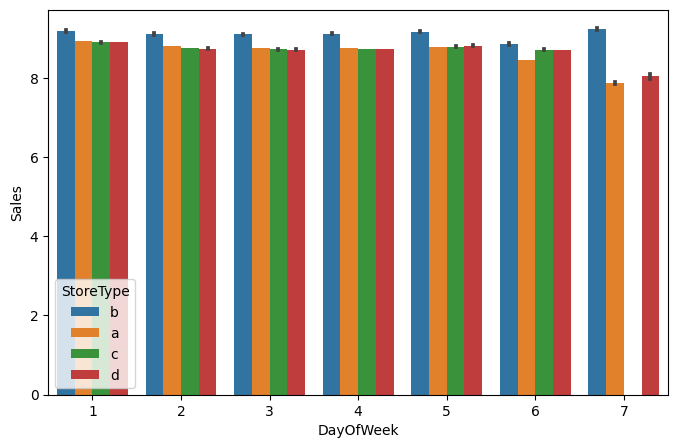

In [54]:
#let's explore store type and Day Of week
sns.barplot(x=df1['DayOfWeek'],y=df1["Sales"],hue=df1['StoreType'])

In [55]:
#let's verify in the full dataset
df1.loc[(df1['DayOfWeek']==7) & (df1['StoreType']=='b')]

DayOfWeek      Sales  Customers  Promo  StateHoliday  \
Date       Store                                                         
2013-01-06 85             7   9.259987       1509      0             0   
           259            7   8.977904       1686      0             0   
           262            7  10.053630       3479      0             0   
           274            7   8.243283        932      0             0   
           335            7   8.883640       1310      0             0   
...                     ...        ...        ...    ...           ...   
2015-07-26 733            7   9.691037       3352      0             0   
           769            7   9.312446       2783      0             0   
           948            7   9.395990       2346      0             0   
           1081           7   8.659734        875      0             0   
           1097           7   9.496045       2710      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-06 85                 0         b          a               1870.0   
           259                1         b          b                210.0   
           262                0         b          a               1180.0   
           274                1         b          b               3640.0   
           335                0         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-26 733                0         b          b                860.0   
           769                0         b          b                840.0   
           948                0         b          b               1430.0   
           1081               0         b          a                400.0   
           1097               0         b          b                720.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-06 85          0  2013      1           1          6             15.0   
           259         0  2013      1           1          6              0.0   
           262         0  2013      1           1          6              0.0   
           274         1  2013      1           1          6              0.0   
           335         1  2013      1           1          6              0.0   
...                  ...   ...    ...         ...        ...              ...   
2015-07-26 733         0  2015      7          30        207            189.0   
           769         1  2015      7          30        207             22.0   
           948         0  2015      7          30        207             22.0   
           1081        0  2015      7          30        207            112.0   
           1097        0  2015      7          30        207            160.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-06 85       0.000000              0  
           259      0.000000              0  
           262      0.000000              0  
           274      0.000000              1  
           335      0.000000              1  
...                      ...            ...  
2015-07-26 733      0.000000              0  
           769     31.857534              1  
           948      0.000000              0  
           1081     0.000000              0  
           1097     0.000000              0  

[2216 rows x 17 columns]

In [56]:
#shape
df1.shape

(844338, 17)

In [57]:
#just in case something messes up
df2 = df1.copy()

In [58]:
df2.head(1)

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-01,85,2,8.34759,619,0,1,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0


In [59]:
#Sales should be the last col
columns=list(df2.columns)
columns.remove('Sales')
columns.append('Sales')
df2=df2[columns]

In [60]:
#check
df2.head(1)

,,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
Date,Store,,,,,,,,,,,,,,,,,
2013-01-01,85,2,619,0,1,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0,8.34759


In [61]:
#start date
df2.head(1)

,,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
Date,Store,,,,,,,,,,,,,,,,,
2013-01-01,85,2,619,0,1,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0,8.34759


In [62]:
#end date
df2.tail(1)

,,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
Date,Store,,,,,,,,,,,,,,,,,
2015-07-31,1115,5,538,1,0,1,d,c,5350.0,1,2015,7,31,212,22.0,38.071233,0,9.068777


In [63]:
# we won't need customers for sales forecasting
df2.drop('Customers',axis=1,inplace=True)

In [64]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]

In [65]:
#csv
df_train1 = df_train.to_csv("/content/drive/MyDrive/MajorProjectDatasetFiles/df_train.csv")
df_test2 = df_test.to_csv("/content/drive/MyDrive/MajorProjectDatasetFiles/df_test.csv")

In [66]:
df_train

DayOfWeek  Promo  StateHoliday  SchoolHoliday StoreType  \
Date       Store                                                            
2013-01-01 85             2      0             1              1         b   
           259            2      0             1              1         b   
           262            2      0             1              1         b   
           274            2      0             1              1         b   
           335            2      0             1              1         b   
...                     ...    ...           ...            ...       ...   
2015-06-14 948            7      0             0              0         b   
           1045           7      0             0              0         a   
           1081           7      0             0              0         b   
           1097           7      0             0              0         b   
           1099           7      0             0              0         a   

                 Assortment  CompetitionDistance  Promo2  Year  Month  \
Date       Store                                                        
2013-01-01 85             a               1870.0       0  2013      1   
           259            b                210.0       0  2013      1   
           262            a               1180.0       0  2013      1   
           274            b               3640.0       1  2013      1   
           335            a                 90.0       1  2013      1   
...                     ...                  ...     ...   ...    ...   
2015-06-14 948            b               1430.0       0  2015      6   
           1045           c              26990.0       0  2015      6   
           1081           a                400.0       0  2015      6   
           1097           b                720.0       0  2015      6   
           1099           c                200.0       1  2015      6   

                  WeekOfYear  DayOfYear  CompetitionOpen  Promo2Open  \
Date       Store                                                       
2013-01-01 85              1          1             15.0     0.00000   
           259             1          1              0.0     0.00000   
           262             1          1              0.0     0.00000   
           274             1          1              0.0     0.00000   
           335             1          1              0.0     0.00000   
...                      ...        ...              ...         ...   
2015-06-14 948            24        165             21.0     0.00000   
           1045           24        165             18.0     0.00000   
           1081           24        165            111.0     0.00000   
           1097           24        165            159.0     0.00000   
           1099           24        165             26.0    26.30137   

                  Promo2running     Sales  
Date       Store                           
2013-01-01 85                 0  8.347590  
           259                0  8.832150  
           262                0  9.756552  
           274                1  8.039802  
           335                1  7.783641  
...                         ...       ...  
2015-06-14 948                0  9.342946  
           1045               0  8.214736  
           1081               0  8.658866  
           1097               0  9.531554  
           1099               0  8.468213  

[798486 rows x 16 columns]

In [67]:
df[df['DayOfWeek'] == 3]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
2230,1,3,2015-07-29,4782,523,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,210
2231,2,3,2015-07-29,6402,727,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,210
2232,3,3,2015-07-29,7610,716,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,210
2233,4,3,2015-07-29,10514,1258,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,210
2234,5,3,2015-07-29,5899,658,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016090,1111,3,2013-01-02,5097,505,1,0,0,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,2
1016091,1112,3,2013-01-02,10797,892,1,0,0,1,c,...,4.0,2006.0,0,0.0,0.0,0,2013,1,1,2
1016092,1113,3,2013-01-02,6218,753,1,0,0,1,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,2
1016093,1114,3,2013-01-02,20642,3401,1,0,0,1,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,2


In [81]:
df[df['Store']==85 and df['Date']=='2013-01-01']

ValueError: ignored

In [68]:
df[df['Store']==85]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
84,85,5,2015-07-31,7791,971,1,1,0,1,b,...,10.0,2011.0,0,0.0,0.0,0,2015,7,31,212
1199,85,4,2015-07-30,7187,1000,1,1,0,1,b,...,10.0,2011.0,0,0.0,0.0,0,2015,7,31,211
2314,85,3,2015-07-29,7719,889,1,1,0,1,b,...,10.0,2011.0,0,0.0,0.0,0,2015,7,31,210
3429,85,2,2015-07-28,7533,920,1,1,0,1,b,...,10.0,2011.0,0,0.0,0.0,0,2015,7,31,209
4544,85,1,2015-07-27,7788,956,1,1,0,1,b,...,10.0,2011.0,0,0.0,0.0,0,2015,7,31,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011719,85,6,2013-01-05,5774,772,1,0,0,0,b,...,10.0,2011.0,0,0.0,0.0,0,2013,1,1,5
1012834,85,5,2013-01-04,5339,805,1,0,0,1,b,...,10.0,2011.0,0,0.0,0.0,0,2013,1,1,4
1013949,85,4,2013-01-03,5246,820,1,0,0,1,b,...,10.0,2011.0,0,0.0,0.0,0,2013,1,1,3
1015064,85,3,2013-01-02,6069,914,1,0,0,1,b,...,10.0,2011.0,0,0.0,0.0,0,2013,1,1,2


In [68]:
df_train

DayOfWeek  Promo  StateHoliday  SchoolHoliday StoreType  \
Date       Store                                                            
2013-01-01 85             2      0             1              1         b   
           259            2      0             1              1         b   
           262            2      0             1              1         b   
           274            2      0             1              1         b   
           335            2      0             1              1         b   
...                     ...    ...           ...            ...       ...   
2015-06-14 948            7      0             0              0         b   
           1045           7      0             0              0         a   
           1081           7      0             0              0         b   
           1097           7      0             0              0         b   
           1099           7      0             0              0         a   

                 Assortment  CompetitionDistance  Promo2  Year  Month  \
Date       Store                                                        
2013-01-01 85             a               1870.0       0  2013      1   
           259            b                210.0       0  2013      1   
           262            a               1180.0       0  2013      1   
           274            b               3640.0       1  2013      1   
           335            a                 90.0       1  2013      1   
...                     ...                  ...     ...   ...    ...   
2015-06-14 948            b               1430.0       0  2015      6   
           1045           c              26990.0       0  2015      6   
           1081           a                400.0       0  2015      6   
           1097           b                720.0       0  2015      6   
           1099           c                200.0       1  2015      6   

                  WeekOfYear  DayOfYear  CompetitionOpen  Promo2Open  \
Date       Store                                                       
2013-01-01 85              1          1             15.0     0.00000   
           259             1          1              0.0     0.00000   
           262             1          1              0.0     0.00000   
           274             1          1              0.0     0.00000   
           335             1          1              0.0     0.00000   
...                      ...        ...              ...         ...   
2015-06-14 948            24        165             21.0     0.00000   
           1045           24        165             18.0     0.00000   
           1081           24        165            111.0     0.00000   
           1097           24        165            159.0     0.00000   
           1099           24        165             26.0    26.30137   

                  Promo2running     Sales  
Date       Store                           
2013-01-01 85                 0  8.347590  
           259                0  8.832150  
           262                0  9.756552  
           274                1  8.039802  
           335                1  7.783641  
...                         ...       ...  
2015-06-14 948                0  9.342946  
           1045               0  8.214736  
           1081               0  8.658866  
           1097               0  9.531554  
           1099               0  8.468213  

[798486 rows x 16 columns]

In [69]:
#X and y split for train and test 
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (798486, 15)
The shape of y_train is: (798486, 1)
The shape of X_test is: (45852, 15)
The shape of y_test is: (45852, 1)


In [70]:
#importing
from sklearn.preprocessing import OneHotEncoder
#categorical features
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']
#fit encoder
encoder = OneHotEncoder(sparse=False)
# train
encoder.fit(X_train[categorical_cols])
encoded_features = list(encoder.get_feature_names_out(categorical_cols))
X_train[encoded_features] = encoder.transform(X_train[categorical_cols])
# test
X_test[encoded_features] = encoder.transform(X_test[categorical_cols])
# drop original features
X_train.drop(categorical_cols,axis=1,inplace=True)
X_test.drop(categorical_cols,axis=1,inplace=True)

In [71]:
X_train

Promo  StateHoliday  SchoolHoliday  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85         0             1              1               1870.0   
           259        0             1              1                210.0   
           262        0             1              1               1180.0   
           274        0             1              1               3640.0   
           335        0             1              1                 90.0   
...                 ...           ...            ...                  ...   
2015-06-14 948        0             0              0               1430.0   
           1045       0             0              0              26990.0   
           1081       0             0              0                400.0   
           1097       0             0              0                720.0   
           1099       0             0              0                200.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-01 85          0  2013      1           1          1             15.0   
           259         0  2013      1           1          1              0.0   
           262         0  2013      1           1          1              0.0   
           274         1  2013      1           1          1              0.0   
           335         1  2013      1           1          1              0.0   
...                  ...   ...    ...         ...        ...              ...   
2015-06-14 948         0  2015      6          24        165             21.0   
           1045        0  2015      6          24        165             18.0   
           1081        0  2015      6          24        165            111.0   
           1097        0  2015      6          24        165            159.0   
           1099        1  2015      6          24        165             26.0   

                  ...  DayOfWeek_5  DayOfWeek_6  DayOfWeek_7  StoreType_a  \
Date       Store  ...                                                       
2013-01-01 85     ...          0.0          0.0          0.0          0.0   
           259    ...          0.0          0.0          0.0          0.0   
           262    ...          0.0          0.0          0.0          0.0   
           274    ...          0.0          0.0          0.0          0.0   
           335    ...          0.0          0.0          0.0          0.0   
...               ...          ...          ...          ...          ...   
2015-06-14 948    ...          0.0          0.0          1.0          0.0   
           1045   ...          0.0          0.0          1.0          1.0   
           1081   ...          0.0          0.0          1.0          0.0   
           1097   ...          0.0          0.0          1.0          0.0   
           1099   ...          0.0          0.0          1.0          1.0   

                  StoreType_b  StoreType_c  StoreType_d  Assortment_a  \
Date       Store                                                        
2013-01-01 85             1.0          0.0          0.0           1.0   
           259            1.0          0.0          0.0           0.0   
           262            1.0          0.0          0.0           1.0   
           274            1.0          0.0          0.0           0.0   
           335            1.0          0.0          0.0           1.0   
...                       ...          ...          ...           ...   
2015-06-14 948            1.0          0.0          0.0           0.0   
           1045           0.0          0.0          0.0           0.0   
           1081           1.0          0.0          0.0           1.0   
           1097           1.0          0.0          0.0           0.0   
           1099           0.0          0.0          0.0           0.0   

          

In [76]:
"""# scaling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])"""

In [72]:
y_train

Sales
Date       Store          
2013-01-01 85     8.347590
           259    8.832150
           262    9.756552
           274    8.039802
           335    7.783641
...                    ...
2015-06-14 948    9.342946
           1045   8.214736
           1081   8.658866
           1097   9.531554
           1099   8.468213

[798486 rows x 1 columns]

In [73]:
df_train.to_csv('file1.csv')

In [74]:
X_train.to_csv('file2.csv')

In [75]:
X_train.to_csv('/content/drive/MyDrive/MajorProjectDatasetFiles/file2.csv')

In [73]:
#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
    
#checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: [0 'a' 'b' 'c']
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [74]:
X_train.nunique()

Promo                    2
StateHoliday             2
SchoolHoliday            2
CompetitionDistance    655
Promo2                   2
Year                     3
Month                   12
WeekOfYear              52
DayOfYear              365
CompetitionOpen        331
Promo2Open             554
Promo2running            2
DayOfWeek_1              2
DayOfWeek_2              2
DayOfWeek_3              2
DayOfWeek_4              2
DayOfWeek_5              2
DayOfWeek_6              2
DayOfWeek_7              2
StoreType_a              2
StoreType_b              2
StoreType_c              2
StoreType_d              2
Assortment_a             2
Assortment_b             2
Assortment_c             2
dtype: int64

In [98]:
X_train.to_csv('file22.csv')

In [99]:
y_train.to_csv('file33.csv')

In [78]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

In [79]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [92]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

In [77]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [76]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

The Mean Absolute Error for the validation set is 0.271882
The Mean Squared Error for the validation set is 0.123073
The Root Mean Squared Error for the validation set is 0.350817
The R^2 for the validation set is 0.279646
The Adjusted R^2 for the validation set is 0.279237


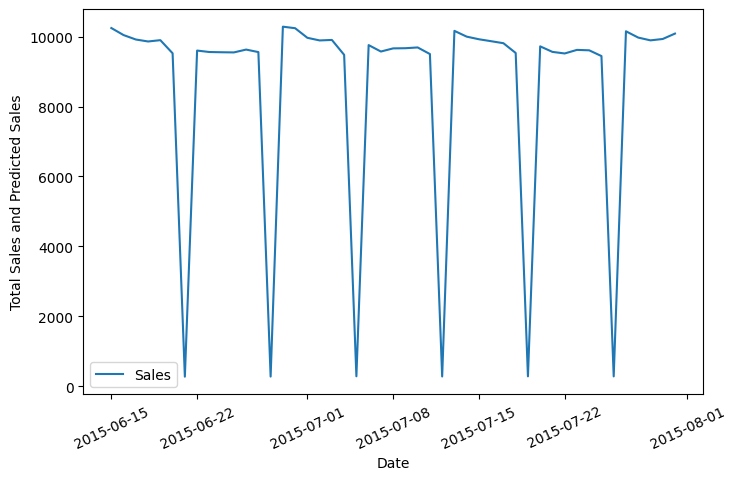

In [81]:
# linear regressin evaluation
linear_regression = model_evaluation('Linear Regressor',lr,X_train,y_train,X_test,y_test)

In [93]:
#add results to comparison df
add_list_to_final_df(linear_regression)

In [94]:
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regressor,0.288813,0.138042,0.37154,0.238914,0.238889,0.271882,0.123073,0.350817,0.279646,0.279237


In [82]:
#Importing libraries 
from sklearn.tree import DecisionTreeRegressor
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [83]:
#fitting decision tree
dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

The Mean Absolute Error for the validation set is 0.149046
The Mean Squared Error for the validation set is 0.046231
The Root Mean Squared Error for the validation set is 0.215013
The R^2 for the validation set is 0.729408
The Adjusted R^2 for the validation set is 0.729255


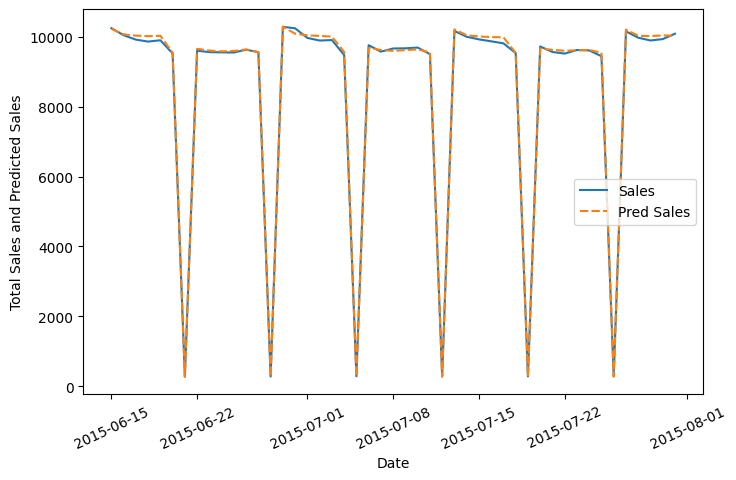

In [84]:
#decision tree evaluation
decision_tree = model_evaluation('Decision Tree Regressor',dt_basic,X_train,y_train,X_test,y_test)

In [95]:
#add results to comparison df
add_list_to_final_df(decision_tree)

In [96]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regressor,0.288813,0.138042,0.371540,0.238914,0.238889,0.271882,0.123073,0.350817,0.279646,0.279237
1,Decision Tree Regressor,0.001652,0.000601,0.024508,0.996688,0.996688,0.149046,0.046231,0.215013,0.729408,0.729255


In [87]:
# importing
from sklearn.ensemble import RandomForestRegressor

In [88]:
# fitting 
random_forest = RandomForestRegressor(n_estimators=100,random_state=42)
random_forest.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

The Mean Absolute Error for the validation set is 0.115279
The Mean Squared Error for the validation set is 0.025759
The Root Mean Squared Error for the validation set is 0.160496
The R^2 for the validation set is 0.849231
The Adjusted R^2 for the validation set is 0.849145


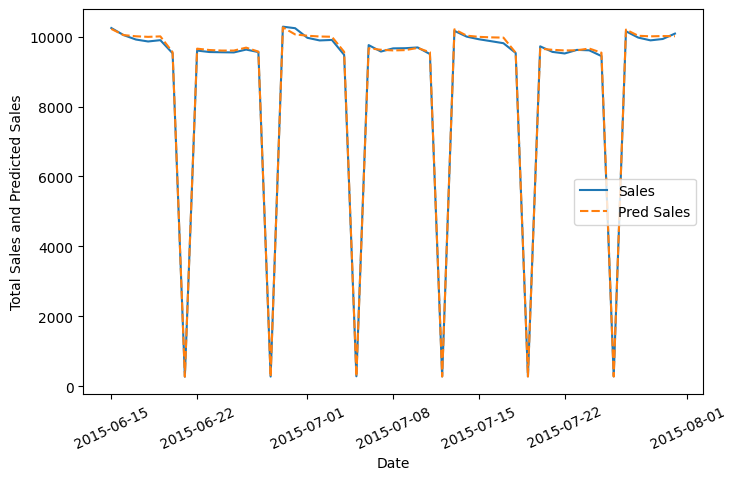

In [89]:
#model evaluation 
random_f = model_evaluation('Random Forest Regressor',random_forest,X_train,y_train,X_test,y_test)

In [97]:
# updating comparison df
add_list_to_final_df(random_f)

In [98]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regressor,0.288813,0.138042,0.371540,0.238914,0.238889,0.271882,0.123073,0.350817,0.279646,0.279237
1,Decision Tree Regressor,0.001652,0.000601,0.024508,0.996688,0.996688,0.149046,0.046231,0.215013,0.729408,0.729255
2,Random Forest Regressor,0.035874,0.003028,0.055026,0.983306,0.983306,0.115279,0.025759,0.160496,0.849231,0.849145


In [99]:
from xgboost import XGBRegressor
# Training
model = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)

model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse",  
   eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)



[0]	validation_0-rmse:7.44162	validation_1-rmse:7.47408
[1]	validation_0-rmse:6.69957	validation_1-rmse:6.73137
[2]	validation_0-rmse:6.03157	validation_1-rmse:6.06346
[3]	validation_0-rmse:5.43048	validation_1-rmse:5.46175
[4]	validation_0-rmse:4.88965	validation_1-rmse:4.92059
[5]	validation_0-rmse:4.40311	validation_1-rmse:4.43290
[6]	validation_0-rmse:3.96546	validation_1-rmse:3.99492
[7]	validation_0-rmse:3.57193	validation_1-rmse:3.60029
[8]	validation_0-rmse:3.21786	validation_1-rmse:3.24518
[9]	validation_0-rmse:2.89961	validation_1-rmse:2.92470
[10]	validation_0-rmse:2.61334	validation_1-rmse:2.63696
[11]	validation_0-rmse:2.35592	validation_1-rmse:2.37884
[12]	validation_0-rmse:2.12483	validation_1-rmse:2.14567
[13]	validation_0-rmse:1.91732	validation_1-rmse:1.93570
[14]	validation_0-rmse:1.73057	validation_1-rmse:1.74811
[15]	validation_0-rmse:1.56316	validation_1-rmse:1.58017
[16]	validation_0-rmse:1.41292	validation_1-rmse:1.43005
[17]	validation_0-rmse:1.27820	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=0.5, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

The Mean Absolute Error for the validation set is 0.102612
The Mean Squared Error for the validation set is 0.020029
The Root Mean Squared Error for the validation set is 0.141524
The R^2 for the validation set is 0.882768
The Adjusted R^2 for the validation set is 0.882701


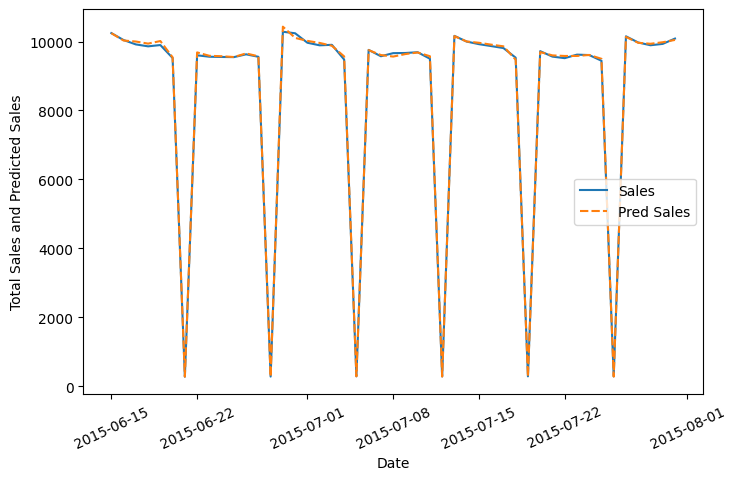

In [100]:
#model evaluation 
xgbst = model_evaluation('Xgboost Regressor',model,X_train,y_train,X_test,y_test)

In [83]:
import pickle
pickle.dump(model,open('vector.pkl','wb'))

In [84]:
import pickle
pickle.dump(model,open('/content/drive/MyDrive/MajorProjectDatasetFiles/vector.pkl','wb'))

In [101]:
# updating comparison df
add_list_to_final_df(xgbst)

In [102]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regressor,0.288813,0.138042,0.371540,0.238914,0.238889,0.271882,0.123073,0.350817,0.279646,0.279237
1,Decision Tree Regressor,0.001652,0.000601,0.024508,0.996688,0.996688,0.149046,0.046231,0.215013,0.729408,0.729255
2,Random Forest Regressor,0.035874,0.003028,0.055026,0.983306,0.983306,0.115279,0.025759,0.160496,0.849231,0.849145
3,Xgboost Regressor,0.064522,0.008168,0.090376,0.954967,0.954966,0.102612,0.020029,0.141524,0.882768,0.882701


In [103]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

In [104]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [105]:
#function to create the comparison table
final_listt = []
def add_list_to_final_dff(dict_list):
  global final_listt
  for elem in dict_list:
    final_listt.append(elem)
  global comparison_dff
  comparison_dff = pd.DataFrame(final_listt, columns= comparison_columns)

In [106]:
#add results to comparison df
add_list_to_final_dff(linear_regression)
#add results to comparison df
add_list_to_final_dff(decision_tree)
# updating comparison df
add_list_to_final_dff(random_f)
# updating comparison df
add_list_to_final_dff(xgbst)

In [107]:
comparison_dff

,Model_Name,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regressor,0.271882,0.123073,0.350817,0.279646,0.279237
1,Decision Tree Regressor,0.149046,0.046231,0.215013,0.729408,0.729255
2,Random Forest Regressor,0.115279,0.025759,0.160496,0.849231,0.849145
3,Xgboost Regressor,0.102612,0.020029,0.141524,0.882768,0.882701


In [108]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Test_MAE', 'Test_RMSE', 'Test_Adj_R2']

In [109]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_test,RMSE_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [110]:
#function to create the comparison table
final_listt = []
def add_list_to_final_dff(dict_list):
  global final_listt
  for elem in dict_list:
    final_listt.append(elem)
  global comparison_dff
  comparison_dff = pd.DataFrame(final_listt, columns= comparison_columns)

In [111]:
#add results to comparison df
add_list_to_final_dff(linear_regression)
#add results to comparison df
add_list_to_final_dff(decision_tree)
# updating comparison df
add_list_to_final_dff(random_f)
# updating comparison df
add_list_to_final_dff(xgbst)

In [112]:
comparison_dff

,Model_Name,Test_MAE,Test_RMSE,Test_Adj_R2
0,Linear Regressor,0.271882,0.350817,0.279237
1,Decision Tree Regressor,0.149046,0.215013,0.729255
2,Random Forest Regressor,0.115279,0.160496,0.849145
3,Xgboost Regressor,0.102612,0.141524,0.882701
